In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from drugOrg import importDrugs
from drugOrg import tempFilter
from sklearn.metrics import mean_squared_error
from statistics import mean 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

drug number:  0  error:  0.02461683142824922
drug number:  1  error:  0.015033815672073403
drug number:  2  error:  -0.013806519816424334
drug number:  3  error:  0.19711142163563222
drug number:  4  error:  -0.014842449130989088
drug number:  5  error:  0.2315842958807136
drug number:  6  error:  0.37536495777200996
drug number:  7  error:  -0.1108491328844563
drug number:  8  error:  0.16756181379685786
drug number:  9  error:  0.12348445824415011
drug number:  10  error:  0.05268037251072166
drug number:  11  error:  0.35462309765477307
drug number:  12  error:  0.14069765482106344
drug number:  13  error:  -0.07788447624646588
drug number:  14  error:  -0.19055354644090028
drug number:  15  error:  0.35277150383429456
drug number:  16  error:  0.18448097586912304
drug number:  17  error:  0.27358083614900663
drug number:  18  error:  -0.4333967562380048
drug number:  19  error:  -0.11190557116546129
drug number:  20  error:  -0.043206026675185694
drug number:  21  error:  0.0660130

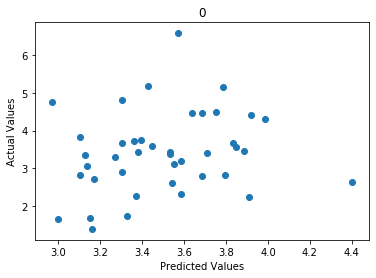

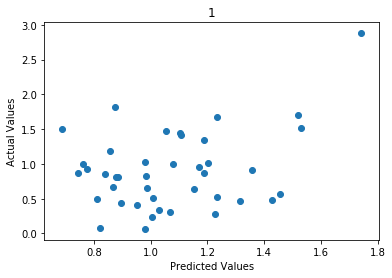

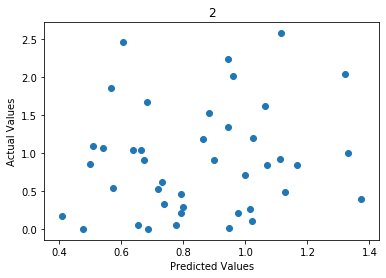

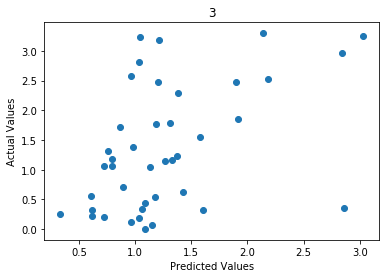

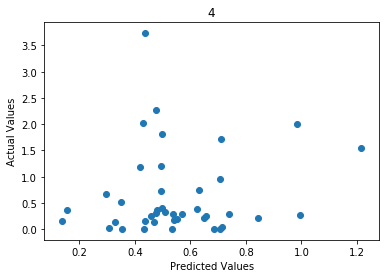

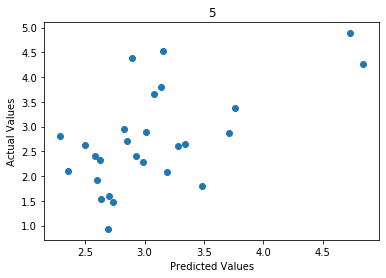

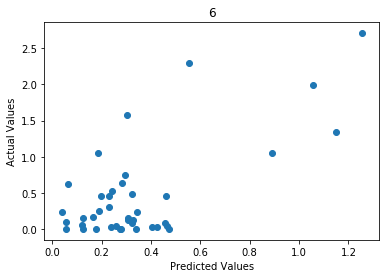

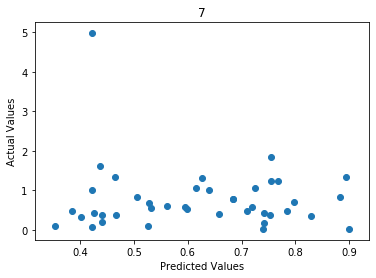

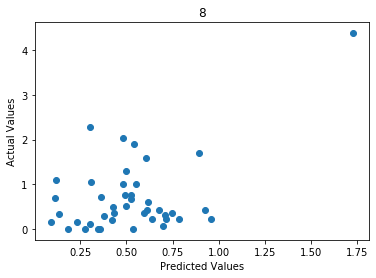

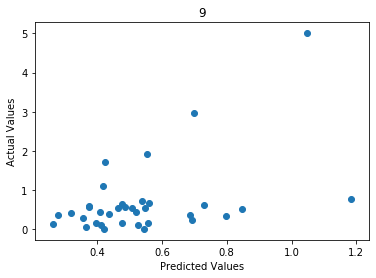

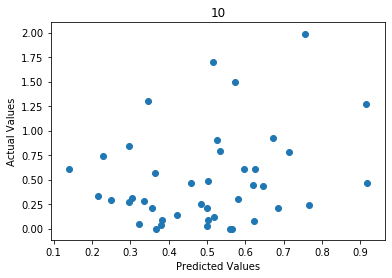

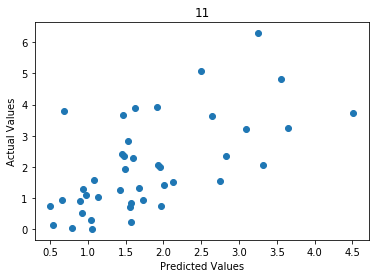

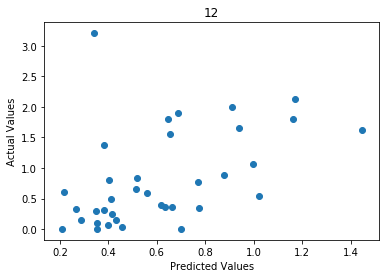

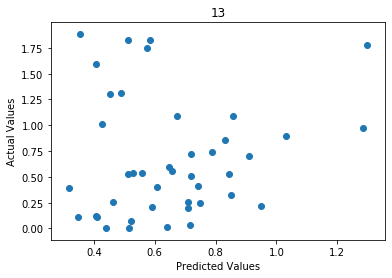

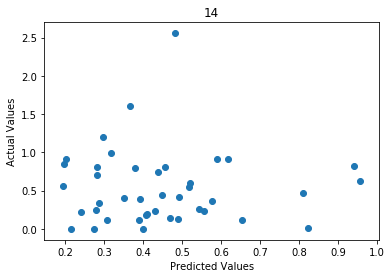

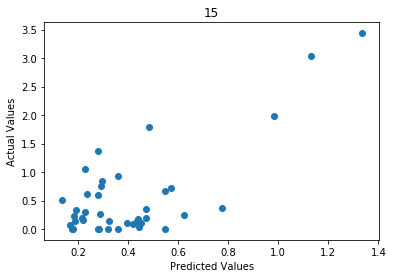

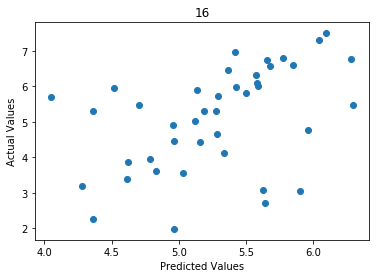

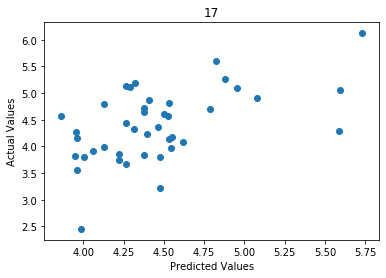

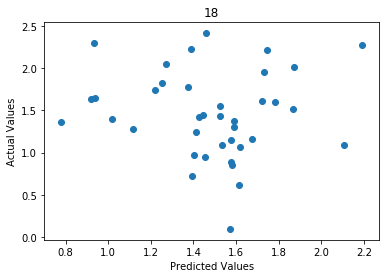

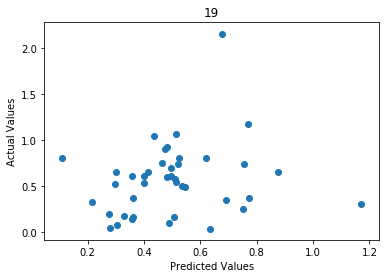

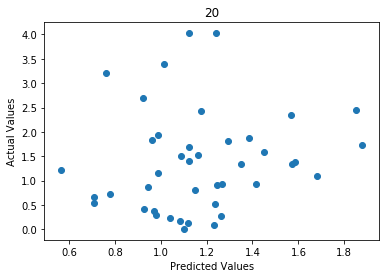

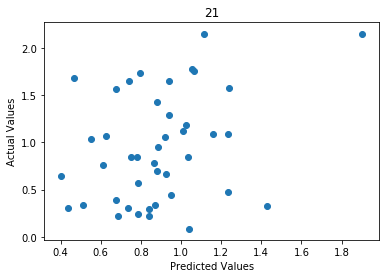

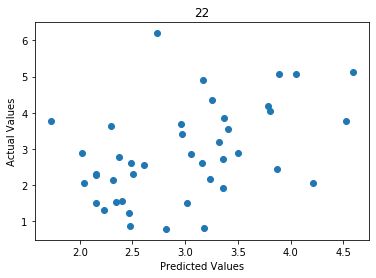

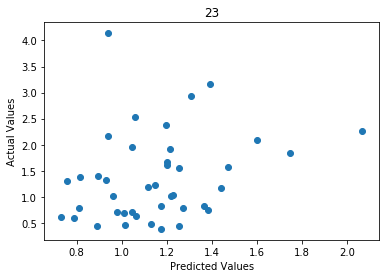

In [4]:
full_drugs = importDrugs()
error = []
for drug_number in range(len(full_drugs)):
    plt.figure()
    factors, drugs = tempFilter(full_drugs[drug_number])
    col_number = -1
    X_train, X_test, y_train, y_test = train_test_split(factors, drugs[:,col_number], test_size=0.1, random_state=42)
    clf = svm.SVR()
    clf.fit(X_train, y_train)
    predict_vals = clf.predict(X_test)
    r2_error = r2_score(y_test, predict_vals)
    print('drug number: ', drug_number, ' error: ',r2_error)
    error.append(mean_squared_error(y_test, predict_vals))
    plt.scatter(predict_vals, y_test)
    plt.title(drug_number)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    x = [0,1.5]
    y = [0,1.5]
#     print(predict_vals.shape)
avg_error = mean(error)
print("Average error is", avg_error)

drug number:  0  error:  0.4170214141609956
drug number:  1  error:  0.5576526027888657
drug number:  2  error:  0.41378959865200393
drug number:  3  error:  0.5058568152998844
drug number:  4  error:  0.396365748086314
drug number:  5  error:  0.6535504242924699
drug number:  6  error:  0.5812962383126035
drug number:  7  error:  0.258637610992011
drug number:  8  error:  0.5562119315574656
drug number:  9  error:  0.33745353831262004
drug number:  10  error:  0.5394224842535844
drug number:  11  error:  0.5284479589130543
drug number:  12  error:  0.5781289470619598
drug number:  13  error:  0.4631137516771848
drug number:  14  error:  0.43110440612686485
drug number:  15  error:  0.5358636332731801
drug number:  16  error:  0.49787499458746076
drug number:  17  error:  0.6574471805946149
drug number:  18  error:  0.4874969379502827
drug number:  19  error:  0.5719500520911186
drug number:  20  error:  0.4827828653160129
drug number:  21  error:  0.5197628115947206
drug number:  22  

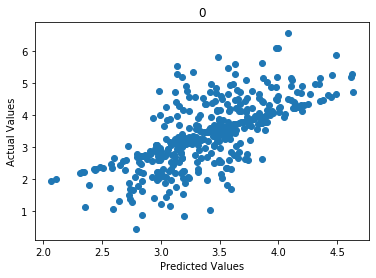

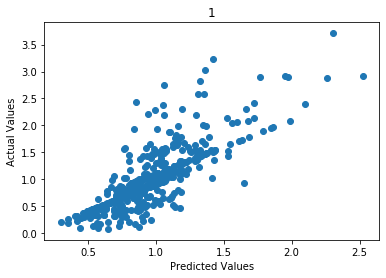

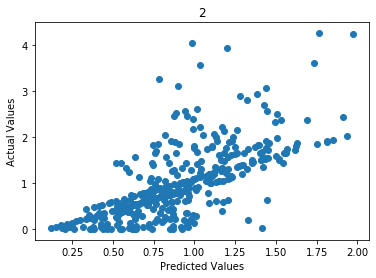

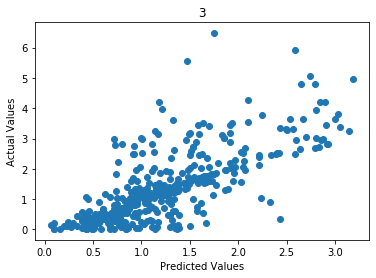

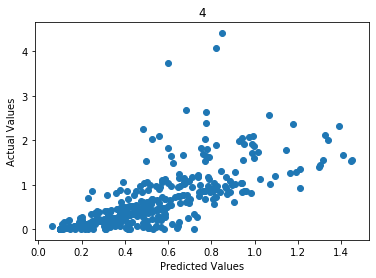

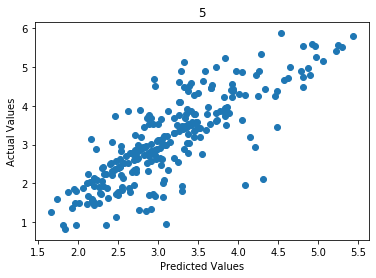

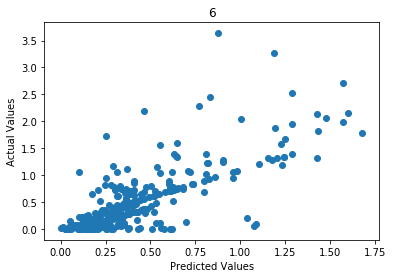

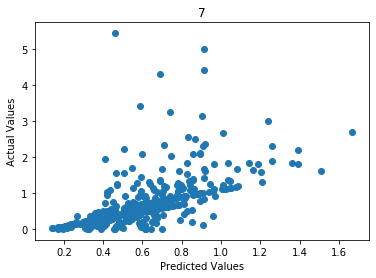

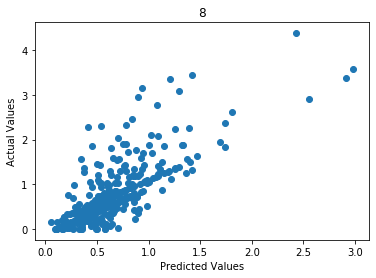

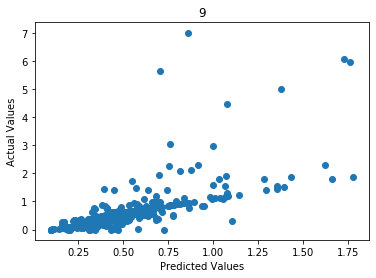

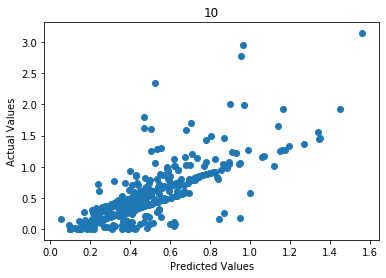

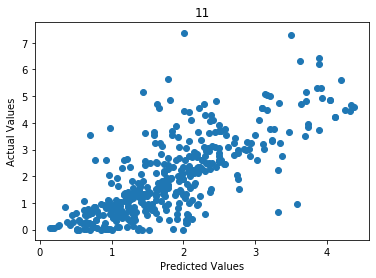

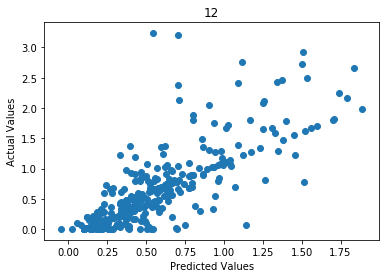

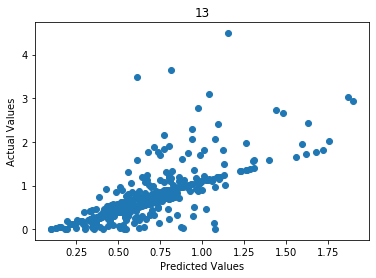

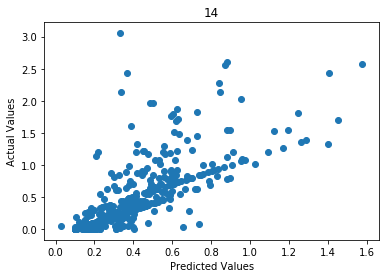

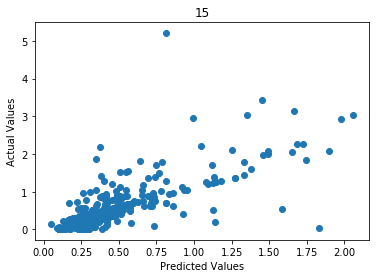

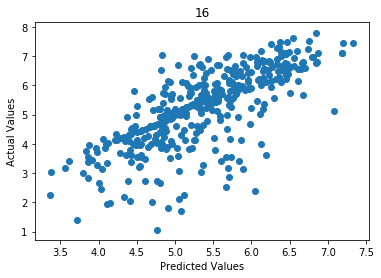

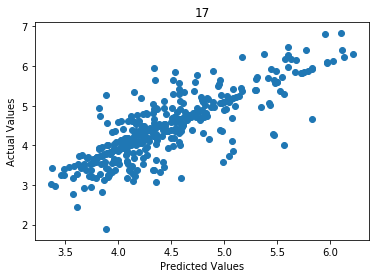

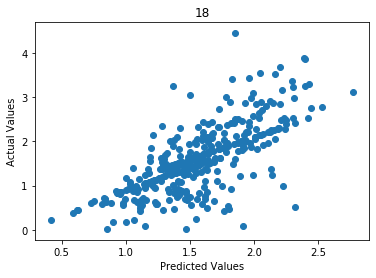

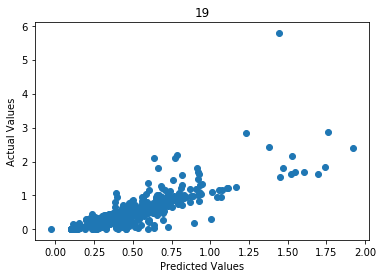

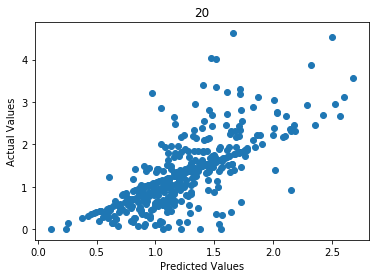

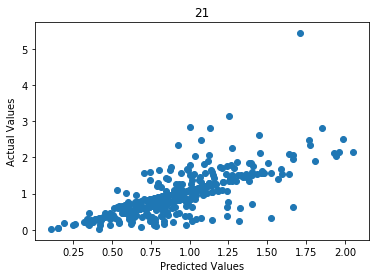

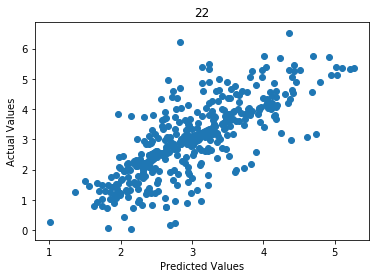

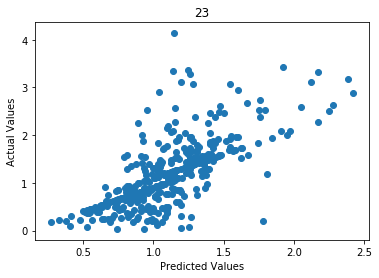

In [13]:
for drug_number in range(len(full_drugs)):
    plt.figure()
    factors, drugs = tempFilter(full_drugs[drug_number])
    col_number = -1
    drugs1 = drugs[:, col_number]
    # X_train, X_test, y_train, y_test = train_test_split(factors, drugs[:,col_number], test_size=0.1, random_state=42)
    clf = svm.SVR()
    clf.fit(factors,drugs1)
    predict_vals = clf.predict(factors)
    r2_error = r2_score(drugs1, predict_vals)
    print('drug number: ', drug_number, ' error: ',r2_error)
    error.append(mean_squared_error(drugs1, predict_vals))
    plt.scatter(predict_vals, drugs1)
    plt.title(drug_number)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
x = [0,1.5]
y = [0,1.5]
avg_error = mean(error)
print("Average error is", avg_error)

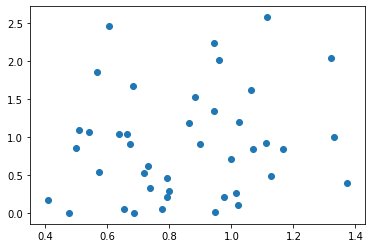

In [31]:
factors, drugs = tempFilter(full_drugs[2])
col_number = -1
X_train, X_test, y_train, y_test = train_test_split(factors, drugs[:,col_number], test_size=0.1, random_state=42)
clf = svm.SVR()
clf.fit(X_train, y_train)
predict_vals = clf.predict(X_test)

plt.scatter(predict_vals, y_test)